In [2]:
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Activation

Load Bostio housing dataset

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
print("Shape of Train Data:", train_data.shape)
print("Shape of Train Targets:", train_targets.shape)

Shape of Train Data: (404, 13)
Shape of Train Targets: (404,)


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

Target Prediction: Predict the median price of homes in a given suburb of Boston.

In [5]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

print("Train Data Head:")
for name, value in zip(column_names, train_data[:5]):
    print(f"{name}: {value}")

print("\nTrain Targets Head:")
print(train_targets[:5])  # Print the first 5 values of train_targets

print("\nTrain Data Summary:")
print("Mean:", np.mean(train_data, axis=0))
print("Std:", np.std(train_data, axis=0))
print("Min:", np.min(train_data, axis=0))
print("Max:", np.max(train_data, axis=0))

print("\nTrain Targets Summary:")
print("Mean:", np.mean(train_targets))
print("Std:", np.std(train_targets))
print("Min:", np.min(train_targets))
print("Max:", np.max(train_targets))

Train Data Head:
CRIM: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
ZN: [2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]
INDUS: [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00]
CHAS: [3.9610e-02 0.0000e+00 5.1900e+00 0.0000e+00 5.1500e-01 6.0370e+00
 3.4500e+01 5.9853e+00 5.0000e+00 2.2400e+02 2.0200e+01 3.9690e+02
 8.0100e+00]
NOX: [  3.69311   0.       18.1       0.        0.713     6.376    88.4
   2.5671   24.      666.       20.2     391.43     14.65   ]

Train Targets Head:
[15.2 42.3 50.  21.1 17.7]

Train Data Summary:
Mean: [3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 

Feeding a neural network with input values that have vastly different ranges can create significant issues. While the network may adapt to this heterogeneous data, it will likely complicate the learning process. A common best practice to address this issue is feature-wise normalization. This involves subtracting the mean and dividing by the standard deviation for each feature (column) in the input data matrix, ensuring that the feature is centered around 0 with a unit standard deviation.



In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [13]:
def build_model():
    inputs=keras.Input(shape=(13,),name='house_pricing')
    x=layers.Dense(64,activation='relu')(inputs)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(1)(x)
    model=keras.Model(inputs=inputs,outputs=outputs,name='BHP_Regression')
    model.summary()
    model.compile(loss='mse', metrics=['mae'], optimizer=keras.optimizers.Adam(0.0005))
    return model

In [15]:
num_epochs = 50
model = build_model()
num_val_samples = len(train_data) // 4
val_data = train_data[:num_val_samples]
val_targets = train_targets[:num_val_samples]
partial_train_data = train_data[num_val_samples:]
partial_train_targets = train_targets[num_val_samples:]
history = model.fit(partial_train_data, partial_train_targets,
 validation_data=(val_data, val_targets),
 epochs=num_epochs, batch_size=10, verbose=0)

Model: "BHP_Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ house_pricing (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

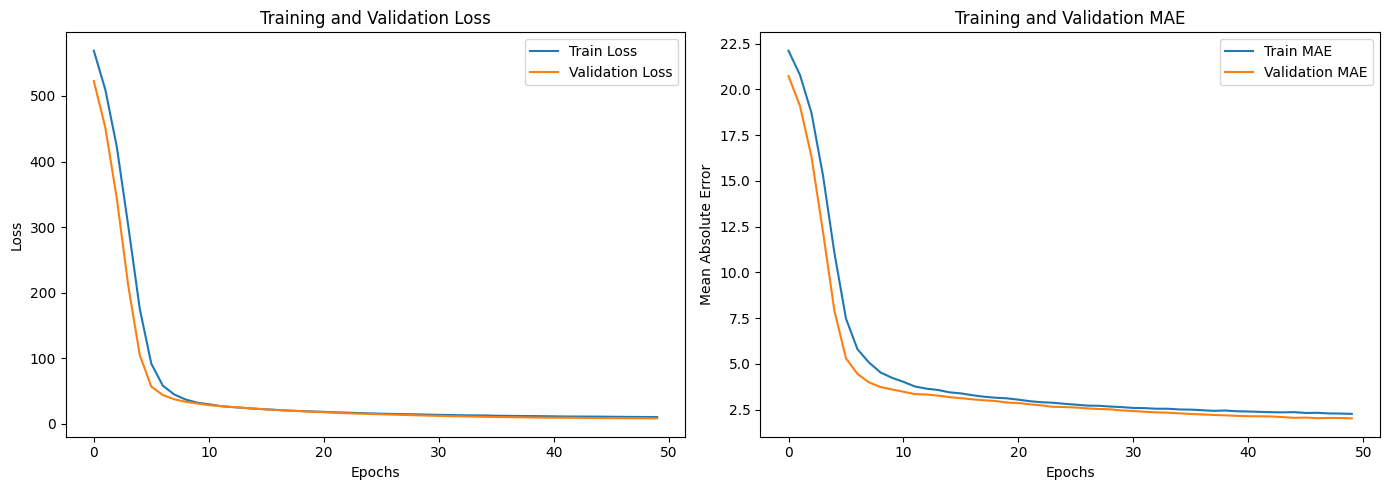

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()
